In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,LSTM

from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import math

In [68]:
df=pd.read_csv("C:\\Users\\LEGION\\Downloads\\Telegram Desktop\\FuturePricePrediction\\BANKNIFTY_FUTURE.csv")
df.head()

,date,open,high,low,close,volume,oi
0,2021-07-30 09:15:00+05:30,34969.80,35036.00,34963.10,35036.00,175,275
1,2021-07-30 09:20:00+05:30,35036.00,35073.85,34950.00,34950.00,75,425
2,2021-07-30 09:25:00+05:30,34950.00,35093.75,34930.00,35093.75,300,450
3,2021-07-30 09:30:00+05:30,35093.75,35093.75,34953.15,34997.65,500,550
4,2021-07-30 09:35:00+05:30,34997.65,35006.00,34990.00,34990.00,100,825


In [109]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

3000

In [110]:
data

,close
0,35036.00
1,34950.00
2,35093.75
3,34997.65
4,34990.00
...,...
3744,38385.20
3745,38380.00
3746,38391.55
3747,38342.00


In [111]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0464846 ],
       [0.0232423 ],
       [0.06209208],
       ...,
       [0.95335324],
       [0.93996189],
       [0.94555626]])

In [130]:
train_data = scaled_data[0:, : ]
x_train=[]
y_train = []
for i in range(40,len(train_data)):
    x_train.append(train_data[i-40:i,0])
    y_train.append(train_data[i,0])

In [131]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [132]:
x_train.shape

(3709, 40)

In [133]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [134]:
x_train.shape

(3709, 40, 1)

In [135]:
model = Sequential()
model.add(LSTM(units=300, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=200))
model.add(Dense(units=100))
model.add(Dense(units=50))
model.add(Dense(units=1))

In [136]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=7, epochs=15)

Epoch 1/15
3709/3709 [==============================] - 42s 11ms/step - loss: 0.0018
Epoch 2/15
3709/3709 [==============================] - 43s 12ms/step - loss: 5.3223e-04
Epoch 3/15
3709/3709 [==============================] - 44s 12ms/step - loss: 5.0220e-04
Epoch 4/15
3709/3709 [==============================] - 44s 12ms/step - loss: 2.7924e-04
Epoch 5/15
3709/3709 [==============================] - 46s 12ms/step - loss: 3.6484e-04
Epoch 6/15
3709/3709 [==============================] - 45s 12ms/step - loss: 2.7617e-04
Epoch 7/15
3709/3709 [==============================] - 51s 14ms/step - loss: 2.5506e-04
Epoch 8/15
 322/3709 [=>............................] - ETA: 48s - loss: 2.6359e-

In [120]:
# here we are testing data set
test_data = scaled_data[training_data_len - 30: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [121]:
x_test = np.array(x_test)

In [122]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [123]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [124]:
predictions

array([[38296.055],
       [38277.434],
       [38206.344],
       [38231.785],
       [38184.46 ],
       [38174.97 ],
       [38151.855],
       [38199.47 ],
       [38221.91 ],
       [38194.58 ],
       [38186.59 ],
       [38210.51 ],
       [38199.45 ],
       [38156.785],
       [38161.207],
       [38174.57 ],
       [38159.902],
       [38147.883],
       [38108.465],
       [38069.125],
       [38084.566],
       [38041.625],
       [38053.69 ],
       [38043.93 ],
       [38087.71 ],
       [38103.293],
       [38135.13 ],
       [38109.33 ],
       [38090.48 ],
       [38086.992],
       [38086.56 ],
       [38061.805],
       [38057.586],
       [38080.137],
       [38048.504],
       [38038.113],
       [37956.5  ],
       [37904.617],
       [37886.523],
       [37865.883],
       [37908.906],
       [37902.7  ],
       [37906.836],
       [37850.863],
       [37834.5  ],
       [37805.637],
       [37782.54 ],
       [37716.918],
       [37749.965],
       [37776.684],


In [125]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

88.47362119107878

C:\Users\LEGION\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


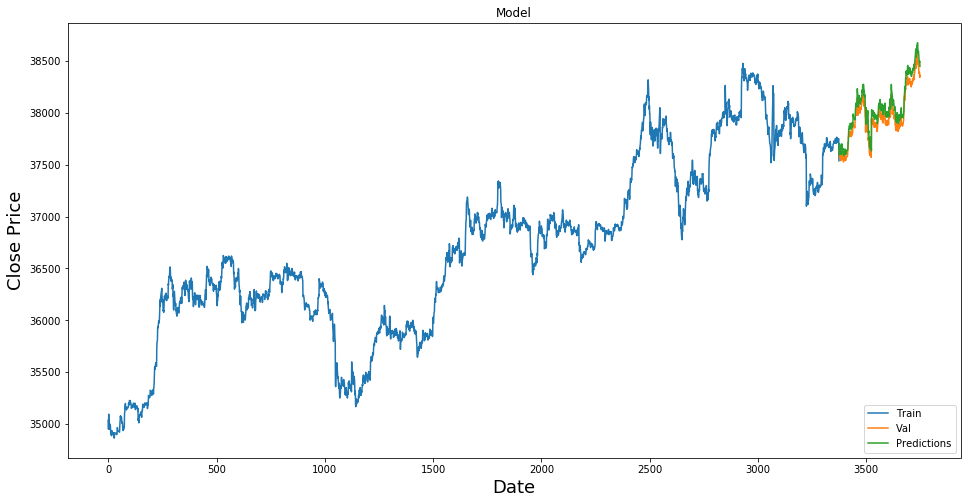

In [104]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [105]:
valid.head()

,close,Predictions
3375,37639.25,37596.808594
3376,37631.35,37704.933594
3377,37579.60,37696.957031
3378,37621.65,37644.933594
3379,37609.00,37689.437500


In [106]:

# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)

In [107]:
y=np.array(valid['Predictions'])
x=np.array(valid['close'])

Prediction Interval: 81.960
95% likelihood that the true value is between 37625.778 and 37789.698
True value: 37596.809


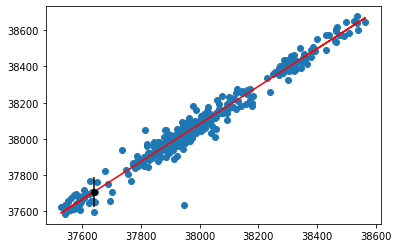

In [108]:
b1, b0, r_value, p_value, std_err = linregress(x, y)
# make predictions
yhat = b0 + b1 * x
# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# estimate stdev of yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = yhat_out - interval, yhat_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()